<a href="https://colab.research.google.com/github/g-tumwesigye/water_quality_model_assignment/blob/MPascal/water_Quallity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# libraries for Model architecture and training process
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Early stopping, optimization, and regulazation
from keras.callbacks import EarlyStopping
# from keras.optimizers import RMSprop, Adam
from keras.optimizers import SGD
from keras.optimizers import Adamax

from keras.regularizers import l2

# 1. Data loading

In [2]:
# importing dataset from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# leading the dataset
df = pd.read_csv('/content/drive/MyDrive/Y3_T1/Water_Quality/dataset/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#  Checking how many missing values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 2. Data pre-processing

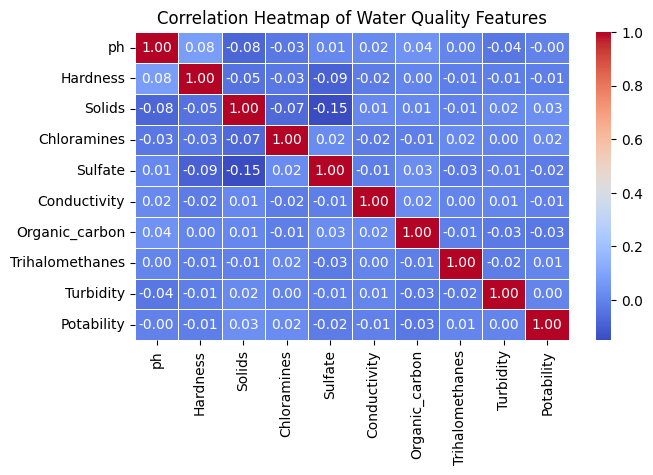

In [6]:
# Generate 2d classification dataset
# Generate the dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# Compute correlation matrix
corr_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Water Quality Features")
plt.show()

In [7]:
#Splitting the dataset into target and features
X = df.drop("Potability", axis=1)
y = df["Potability"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (3276, 9)
Shape of y: (3276,)


In [8]:
# Standardsiding data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# 3. Data Splitting

In [9]:
# First: split into 60% training and 40% (temporary set for validation & test in equal share)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Second: Split the 40% temporary set into 20% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training data: {X_train.shape[0]}")
print(f"Validation data: {X_val.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")

Training data: 1965
Validation data: 655
Testing data: 656


# 3. Model Architecture

In [10]:
# Building model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Defining input shape
    Dense(64, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

# Starting train process

Train: 0.730, Test: 0.671


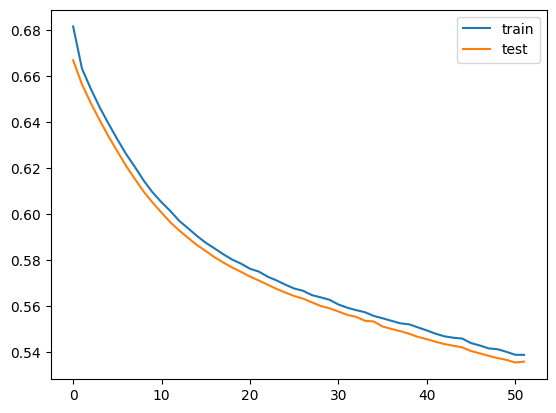

In [11]:
es = EarlyStopping()

#Compile the model
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=4000, verbose=0, callbacks=[es])


# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Compareing how it perform without using early stopping

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.5352 - val_accuracy: 0.6677 - val_loss: 0.6185
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.5195 - val_accuracy: 0.6723 - val_loss: 0.6198
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7383 - loss: 0.5314 - val_accuracy: 0.6707 - val_loss: 0.6195
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7196 - loss: 0.5441 - val_accuracy: 0.6723 - val_loss: 0.6206
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7461 - loss: 0.5296 - val_accuracy: 0.6707 - val_loss: 0.6207
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7309 - loss: 0.5246 - val_accuracy: 0.6677 - val_loss: 0.6215
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7400 - loss: 0.5279 - val_accuracy: 0.6707 - val_loss: 0.6215
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.5238 - val_accuracy: 0.6692 - v

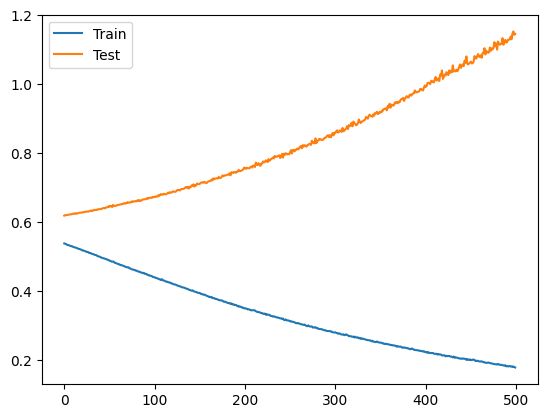

In [12]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1) #callbacks=[es])

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

Train: 0.676, Test: 0.671


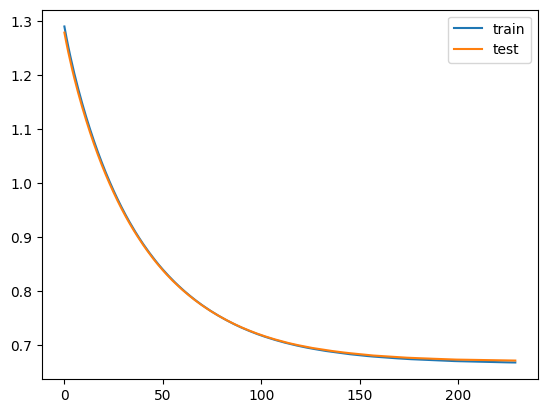

In [13]:
# Early stopping
es = EarlyStopping()

model_L1 = Sequential()
model_L1.add(Input(shape=(X_train.shape[1],)))  # Defining the input shape
model_L1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_L1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_L1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

#Compile the model with Stochastic Gradient Descent
model_L1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_L1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])


# Evaluate the model
_, train_acc = model_L1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_L1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Model Evaluation

In [14]:
# Model accuracy and loss evaluation
loss, acc = model.evaluate(X, y)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {acc:.3f}')

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 10644.5703
Test loss: 9587.553
Test accuracy: 0.390
